## Projekat 1: Procena stepena gojaznosti - klasifikacija

**[Dataset](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition) - Estimation of obesity levels based on eating habits and physical condition**

>This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

>Instances: 2111

>Features: 17

1. Gender (Male, Female)
2. Age
3. Height - in meters
4. Weight - in kilograms
5. family_history_with_overweight (Yes, No)
6. FAVC - frequent consumption of high caloric food (Yes, No)
7. FCVC - frequency of consumption of vegetables (Never, Sometimes, Always) 
8. NCP - number of main meals (One, Two, Three, More than three)
9. CAEC - consumption of food between meals (No, Sometimes, Frequently, Always) 
10. SMOKE (Yes, No)
11. CH2O - consumption of water daily (Less than a liter, Between 1 and 2 L, More than 2 L)  
12. SCC - calorie consumption monitoring (Yes, No) 
13. FAF - physical activity frequency per week (I do not have, 1 or 2 days, 2 or 4 days, 4 or 5 days)  
14. TUE - time using technology devices a day (0–2 hours, 3–5 hours, More than 5 hours)  
15. CALC - consumption of alcohol (No, Sometimes, Frequently, Always) 
16. MTRANS - transportation (Automobile, Motorbike, Bike, Public Transportation, Walking)
17. NObeyesdad - obesity level (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III)

>Class attribute: NObeyesdad

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')

#### Dataset info

In [165]:
data = pd.read_csv("data.csv")

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [167]:
print(f"Number of NaN values in dataset:\n{data.isna().sum()}")

Number of NaN values in dataset:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [168]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [169]:
print(f"Number of duplicates in dataset: {data.duplicated().sum()}")

Number of duplicates in dataset: 24


In [170]:
data[data.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [171]:
data.drop_duplicates(inplace=True)
print(f"Number of duplicates in dataset: {data.duplicated().sum()}")

Number of duplicates in dataset: 0


#### Features

In [172]:
numerical_features = ['Age', 'Height', 'Weight']

In [173]:
data["Age"] = data["Age"].astype(int)

In [174]:
data[numerical_features].describe()

,Age,Height,Weight
count,2087.000000,2087.000000,2087.000000
mean,24.009104,1.702674,86.858730
std,6.333297,0.093186,26.190847
min,14.000000,1.450000,39.000000
25%,19.000000,1.630178,66.000000
50%,22.000000,1.701584,83.101100
75%,26.000000,1.769491,108.015907
max,61.000000,1.980000,173.000000


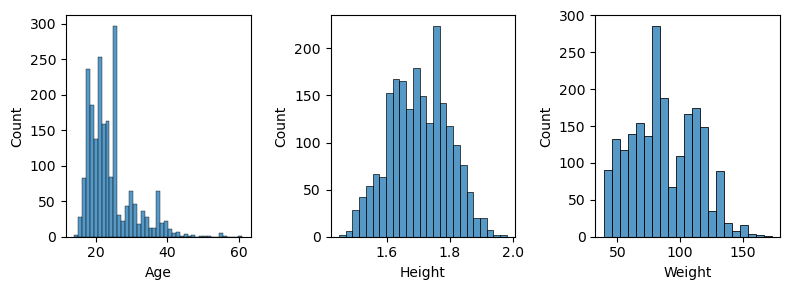

In [175]:
plt.figure(figsize=(8, 3))

for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.histplot(data[feature])

plt.tight_layout()

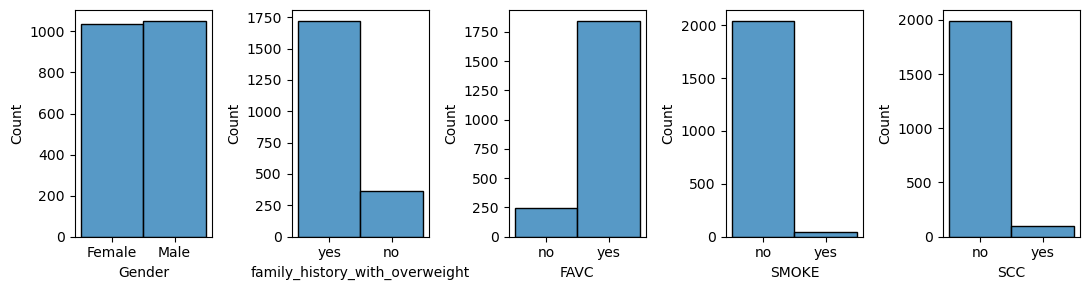

In [176]:
binary_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

plt.figure(figsize=(11, 3))

for i, feature in enumerate(binary_features):
    plt.subplot(1, 5, i+1)
    sns.histplot(data[feature], palette="Blues_r")

plt.tight_layout()

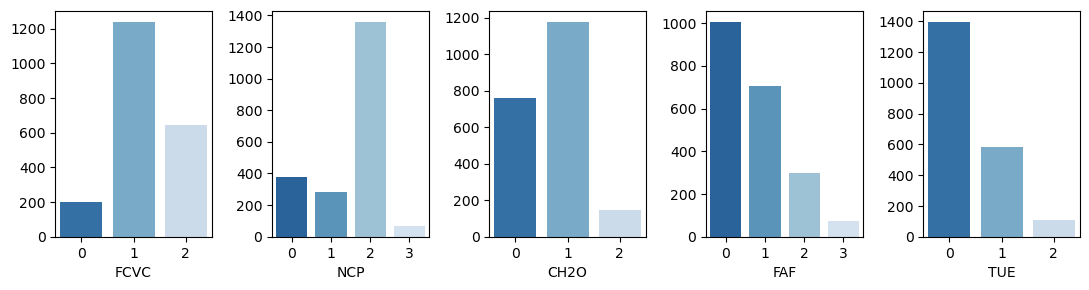

In [177]:
already_encoded_ordinal_features = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

plt.figure(figsize=(11, 3))

for i, feature in enumerate(already_encoded_ordinal_features):
    data[feature] = data[feature].astype(int)
    min_val = min(data[feature])
    if min_val == 1: 
        data[feature] = data[feature] - 1

    plt.subplot(1, 5, i+1)
    counts = data[feature].value_counts()
    plt.xticks(counts.index)
    sns.color_palette("deep")
    sns.barplot(x=counts.index, y=counts.values, palette="Blues_r")

plt.tight_layout()

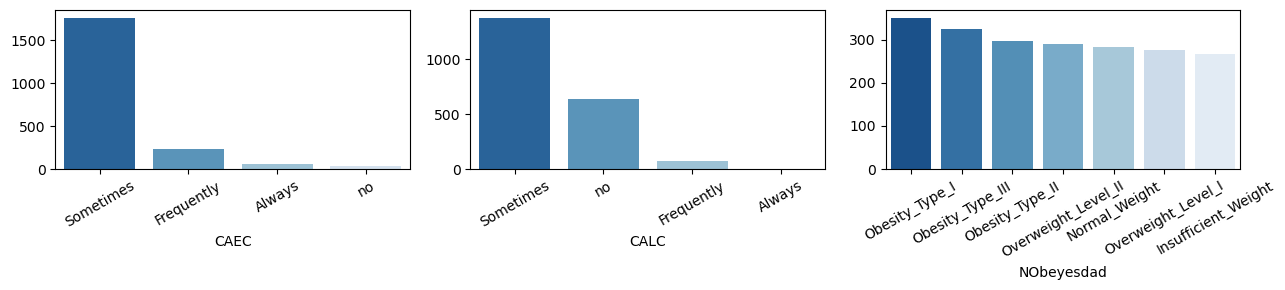

In [178]:
ordinal_features_to_encode = ['CAEC', 'CALC', 'NObeyesdad']

plt.figure(figsize=(13, 3))

for i, feature in enumerate(ordinal_features_to_encode):
    plt.subplot(1, 3, i+1)
    counts = data[feature].value_counts()
    sns.color_palette("deep")
    plt.xticks(rotation=30)
    sns.barplot(x=counts.index, y=counts.values, palette="Blues_r")

plt.tight_layout()

In [179]:
features_for_one_hot_encoding = binary_features + ["MTRANS"]

dummies = pd.get_dummies(data[features_for_one_hot_encoding]).astype(int)
data = data.drop(features_for_one_hot_encoding, axis=1)
data = data.join(dummies)

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2087 non-null   int32  
 1   Height                              2087 non-null   float64
 2   Weight                              2087 non-null   float64
 3   FCVC                                2087 non-null   int32  
 4   NCP                                 2087 non-null   int32  
 5   CAEC                                2087 non-null   object 
 6   CH2O                                2087 non-null   int32  
 7   FAF                                 2087 non-null   int32  
 8   TUE                                 2087 non-null   int32  
 9   CALC                                2087 non-null   object 
 10  NObeyesdad                          2087 non-null   object 
 11  Gender_Female                       2087 non-nul

In [181]:
ordinal_features_for_ordinal_encoding = ['CAEC', 'CALC', 'NObeyesdad']

enc = OrdinalEncoder()
data[ordinal_features_to_encode] = enc.fit_transform(data[ordinal_features_to_encode])

data[ordinal_features_for_ordinal_encoding] = data[ordinal_features_for_ordinal_encoding].astype(int)

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2087 non-null   int32  
 1   Height                              2087 non-null   float64
 2   Weight                              2087 non-null   float64
 3   FCVC                                2087 non-null   int32  
 4   NCP                                 2087 non-null   int32  
 5   CAEC                                2087 non-null   int32  
 6   CH2O                                2087 non-null   int32  
 7   FAF                                 2087 non-null   int32  
 8   TUE                                 2087 non-null   int32  
 9   CALC                                2087 non-null   int32  
 10  NObeyesdad                          2087 non-null   int32  
 11  Gender_Female                       2087 non-nul

In [183]:
print(data.to_string())

      Age    Height      Weight  FCVC  NCP  CAEC  CH2O  FAF  TUE  CALC  NObeyesdad  Gender_Female  Gender_Male  family_history_with_overweight_no  family_history_with_overweight_yes  FAVC_no  FAVC_yes  SMOKE_no  SMOKE_yes  SCC_no  SCC_yes  MTRANS_Automobile  MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking
0      21  1.620000   64.000000     1    2     2     1    0    1     3           1              1            0                                  0                                   1        1         0         1          0       1        0                  0            0                 0                             1               0
1      21  1.520000   56.000000     2    2     2     2    3    0     2           1              1            0                                  0                                   1        1         0         0          1       0        1                  0            0                 0                             1            

### Algorithms:

1. k-Nearest Neighbors
2. Decision Trees
3. Naive Bayes
4. Random Forest
5. Gradient Boosting
6. SVM?
7. Logistic Regression?